In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [4]:
plt.style.use('darkside')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [5]:
voltage = np.arange(60,65,1)
ch = {}
for i in range(4):
    ch[i] = {}
ch[0]['v'] = [2.531,3.057,3.540,4.057,4.561] 
ch[0]['e'] = [0.022,0.020,0.032,0.023,0.019] 
ch[1]['v'] = [2.420,2.904,3.379,3.852,4.351] 
ch[1]['e'] = [0.007,0.008,0.007,0.007,0.009] 
ch[2]['v'] = [2.557,3.043,3.493,3.986,4.501] 
ch[2]['e'] = [0.007,0.008,0.012,0.009,0.011] 
ch[3]['v'] = [2.506,3.064,3.545,4.048,4.555] 
ch[3]['e'] = [0.739,0.016,0.011,0.008,0.006] 

In [6]:
def line(x,a,b):
    return a*(x-b)

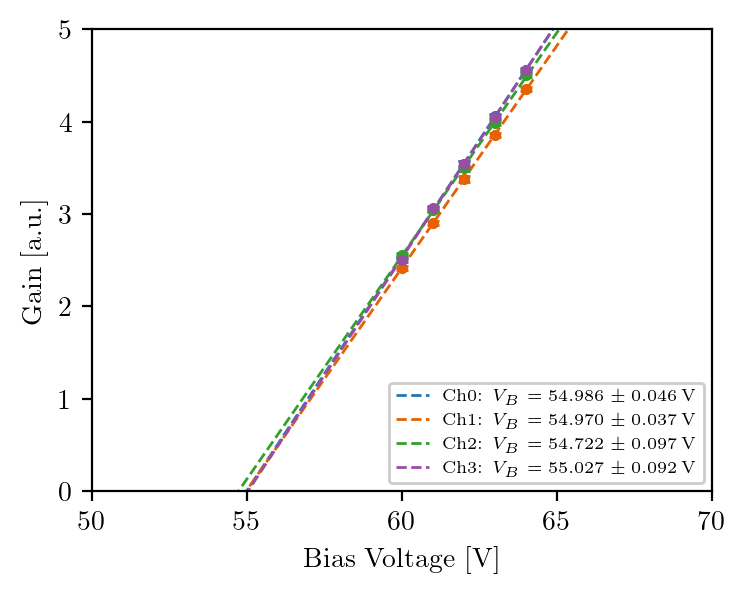

In [7]:
plt.figure()

v_bd = []
v_bd_err = []
for i in range(4):
    popt,pcov = curve_fit(line, voltage, ch[i]['v'])
    perr = np.sqrt(np.diag(pcov))
    xfit = np.linspace(50,70,100)
    breakdown = r'Ch{}: $V_B={:.3f}\pm{:.3f}\,$V'.format(i, popt[1], perr[1])

    v_bd.append(popt[1])
    v_bd_err.append(perr[1])

    plt.plot(xfit, line(xfit, *popt), color=colors[i], label=breakdown, lw=1, ls='--')
    plt.errorbar(voltage, ch[i]['v'], yerr=ch[0]['e'], color=colors[i], ls='None', label='', marker='o', ms=3)

plt.xlabel('Bias Voltage [V]')
plt.ylabel('Gain [a.u.]')
plt.xlim(50,70)
plt.ylim(0,5)
plt.legend(loc='lower right', fontsize=6)
plt.savefig('breakdown_ch0.pdf')
plt.show()

In [8]:
v_bd

[54.98577075126834, 54.97047817024197, 54.72200372516347, 55.02715466342513]

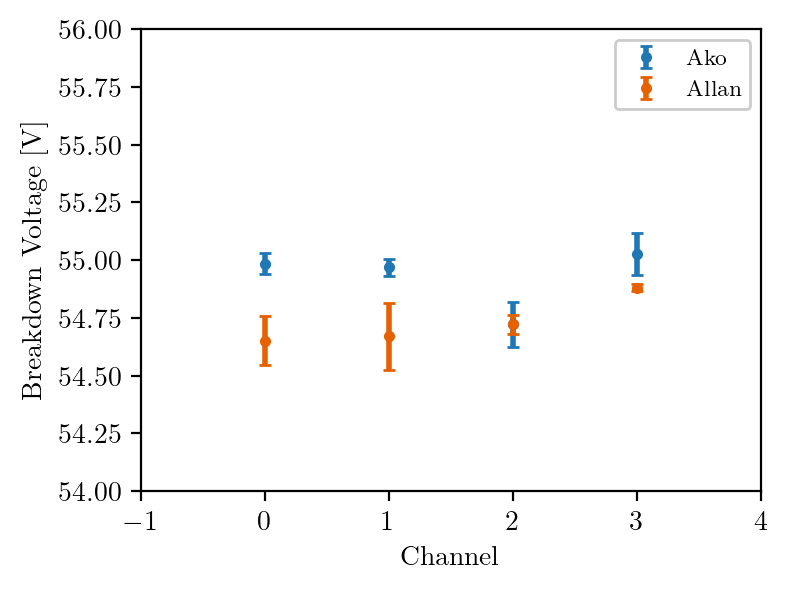

In [12]:
allan_v = [54.651,54.671,54.722,54.881]
allan_err = [0.106,0.145,0.042,0.016]

plt.figure()
plt.xlabel('Channel')
plt.ylabel('Breakdown Voltage [V]')
plt.xlim(-1,4)
plt.ylim(54,56)
plt.errorbar(np.arange(0,4,1), v_bd, yerr=v_bd_err, ls='None', marker='o', ms=3, label='Ako')
plt.errorbar(np.arange(0,4,1), allan_v, yerr=allan_err, ls='None', marker='o', ms=3, label='Allan')
plt.legend(loc='upper right')
plt.savefig('breakdown_comparison.pdf')
plt.show()